# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Question 1

In [2]:
img = cv.imread('boat.jpg')

img2 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
green = (0,255,0)

# Apply Otsu Thresholding
ret, th = cv.threshold(img2, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

#plot the min and max value of coordinate in the mask
pts = np.argwhere(th>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

#Draw bouding box
new_y2 = y1 + (y2 - y1)//2
rect = cv.rectangle(img,(x1,y1),(x2,new_y2),green,2)

cv.imshow('result',img)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

In [3]:
img = cv.imread('leaf.jfif')

# Convert the image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding
ret, th = cv.threshold(img_gray, 30, 255, cv.THRESH_BINARY)

def trackbar(x):
    kernel = np.ones((x,x), np.uint8)
    
    erosion = cv.erode(img_gray, kernel, iterations = 1)
    dilation = cv.dilate(img_gray, kernel, iterations = 1)
    opening = cv.morphologyEx(img_gray, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(img_gray, cv.MORPH_CLOSE, kernel)
    
    cv.imshow('window', np.hstack([erosion, dilation, opening, closing]))

cv.namedWindow('window')
cv.createTrackbar('Structured', 'window', 1, 50, trackbar)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 3

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

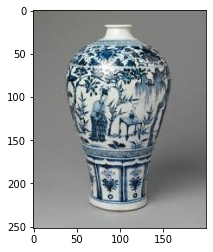

In [5]:
img = cv.imread('porcelain5.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

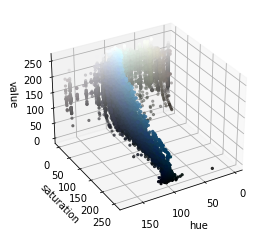

In [6]:
# hsv color space
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

# Normalize the color range to show color for each pixel
pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = 0, vmax = 1)
norm.autoscale(pixel_colors)
pixel_colors= norm(pixel_colors).tolist()

# Plot
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor = pixel_colors,
            marker = ".")

axis.view_init(30, 60)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

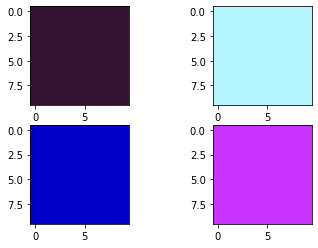

In [7]:
#Verify the hsv that I determined
low_blue = (50, 20, 50)
high_blue = (180, 245, 255)
low_white = (0, 0, 200)
high_white = (200, 50, 255)

square_low_blue = np.full((10, 10, 3), low_blue, dtype = np.uint8)/255.0
square_high_blue = np.full((10, 10, 3), high_blue, dtype = np.uint8)/255.0
square_low_white = np.full((10, 10, 3), low_white, dtype = np.uint8)/255.0
square_high_white = np.full((10, 10, 3), high_white, dtype = np.uint8)/255.0

plt.subplot(2, 2, 1)
plt.imshow(square_low_blue)
plt.subplot(2, 2, 2)
plt.imshow(square_high_blue)
plt.subplot(2, 2, 3)
plt.imshow(square_low_white)
plt.subplot(2, 2, 4)
plt.imshow(square_high_white)
plt.show()

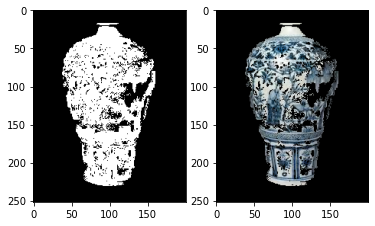

In [8]:
# Mask blue and white
mask = cv.inRange(img_hsv, low_blue, high_blue)
mask2 = cv.inRange(img_hsv, low_white, high_white)

# Combine the masks
comb_mask = cv.bitwise_or(mask, mask2)

res = cv.bitwise_and(img, img, mask = comb_mask)

plt.subplot(1, 2, 1)
plt.imshow(comb_mask, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

## Display all 5 porcelain

In [10]:
list = []

for i in range(1,6):
    img = cv.imread('porcelain'+str(i)+'.jfif')
    
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    img = cv.resize(img, (200,200), interpolation = cv.INTER_NEAREST)
    list.append(img)
    

# Mask blue and white
mask = cv.inRange(img_hsv, low_blue, high_blue)
mask2 = cv.inRange(img_hsv, low_white, high_white)

# Combine the masks
comb_mask = cv.bitwise_or(mask, mask2)
    
result = []
for i in range(0,5):
    img_hsv = cv.cvtColor(list[i], cv.COLOR_RGB2HSV)
    
    res = cv.bitwise_and(img_hsv, img_hsv, mask = comb_mask)
    hsv2rgb = cv.cvtColor(res,cv.COLOR_HSV2RGB)
    result.append(hsv2rgb)

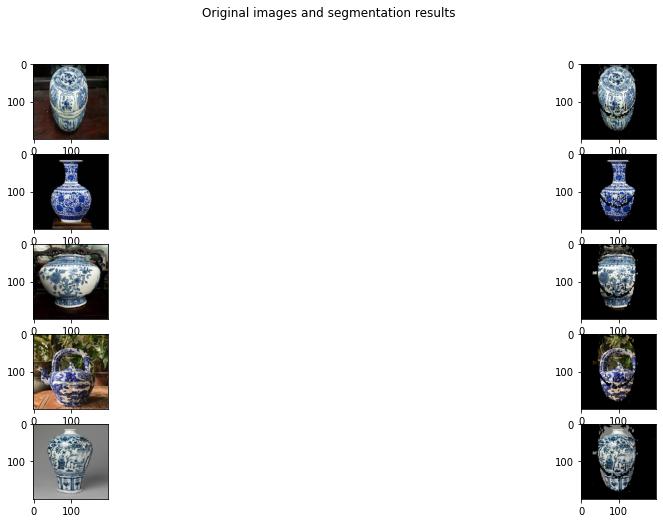

In [11]:
f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(list[i])
    ax[i][1].imshow(result[i])

f.suptitle('Original images and segmentation results')
plt.show()